In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [25]:
c=r'E:\DataBlaze\Public-Datasets-main\bike.csv'
df= pd.read_csv(c)
print(df.head())

   instant    dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1   0        0        6           0   
1        2  1/1/2011       1   0     1   1        0        6           0   
2        3  1/1/2011       1   0     1   2        0        6           0   
3        4  1/1/2011       1   0     1   3        0        6           0   
4        5  1/1/2011       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  
0           1  0.24  0.2879  0.81        0.0   16  
1           1  0.22  0.2727  0.80        0.0   40  
2           1  0.22  0.2727  0.80        0.0   32  
3           1  0.24  0.2879  0.75        0.0   13  
4           1  0.24  0.2879  0.75        0.0    1  


In [26]:
cars= pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv')
cars = cars.dropna(subset=['cty', 'hwy'])
print(cars.head())

  manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact


In [27]:
print(cars.columns)

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')


In [28]:
print(cars.info())
print(cars.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB
None
            displ         year         cyl         cty         hwy
count  234.000000   234.000000  234.000000  234.000000  234.000000
mean     3.471795  2003.500000    5.888889   16.858974   23.440171
std      1.291959     4.509646    1.611534    4.255946    5.954643


In [29]:

# Step 3: Handle missing values
cars = cars.dropna(subset=['cty', 'hwy'])
print("\nMissing values after dropna:")
print(cars.isnull().sum())



Missing values after dropna:
manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64


In [30]:
# Step 4: Remove duplicates
print("\nDuplicate rows:", cars.duplicated().sum())
cars = cars.drop_duplicates()


Duplicate rows: 9


📦 DATA CLEANING WORKFLOW – STEP BY STEP (ENG+BN VERSION)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔹 1. Load and Inspect Data | ডেটা লোড ও পর্যবেক্ষণ
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎯 Goal: Understand your data and identify issues.
🎯 লক্ষ্য: ডেটা বোঝা এবং সমস্যা খুঁজে বের করা।

📌 Code:
import pandas as pd
df = pd.read_csv("data.csv")

### Inspect data | ডেটা কেমন আছে তা দেখা
print(df.head())
print(df.info())
print(df.describe())

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔹 2. Handle Missing Values | Null/NaN ম্যানেজ করা
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎯 Goal: Fill or remove missing values.
🎯 লক্ষ্য: Null মান গুলো মুছে ফেলা বা পূরণ করা।

📌 Code:
### Drop rows with missing values | Null গুলো বাদ দেওয়া
### df = df.dropna()

### Fill with mean/mode | গড় বা মোড দিয়ে পূরণ করা
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔹 3. Remove Duplicates | ডুপ্লিকেট রেকর্ড মুছে ফেলা
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎯 Goal: Remove duplicate records.
🎯 লক্ষ্য: একাধিকবার থাকা রেকর্ডগুলো মুছে ফেলা।

📌 Code:
df = df.drop_duplicates()

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔹 4. Fix Incorrect/Invalid Data | ভুল/অযৌক্তিক ডেটা ঠিক করা
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎯 Goal: Identify and fix invalid values.
🎯 লক্ষ্য: ভুল বা অসম্ভব মান বাদ দেওয়া।

📌 Code:
### Remove rows with invalid age | ০ বা নেগেটিভ বয়স বাদ
df = df[df['Age'] > 0]

### Optional: Filter other invalid data | যেমন: আয় নেগেটিভ নয়
### df = df[df['Income'] >= 0]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔹 5. Fix Data Types | ডেটা টাইপ ঠিক করা
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎯 Goal: Ensure correct data types.
🎯 লক্ষ্য: প্রত্যেক কলামের টাইপ ঠিক করা।

📌 Code:
df['Date'] = pd.to_datetime(df['Date'])
df['Age'] = df['Age'].astype(int)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔹 6. Encode Categorical Data | ক্যাটেগোরিকাল ভ্যালু এনকোড করা
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎯 Goal: Convert categories to numbers.
🎯 লক্ষ্য: ক্যাটেগরিকে নিউমেরিক ভ্যালুতে রূপান্তর।

📌 Code:
### One-hot encoding | আলাদা কলামে রূপান্তর
df = pd.get_dummies(df, columns=['Gender', 'City'])

### Label encoding | একটি কলামে নাম্বার দিয়ে রূপান্তর
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔹 7. Handle Outliers | অস্বাভাবিক মান বাদ দেওয়া
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎯 Goal: Remove extreme/unrealistic values.
🎯 লক্ষ্য: খুব বড় বা ছোট অস্বাভাবিক মান বাদ দেওয়া।

📌 Code:
import numpy as np
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df = df[(df['Income'] >= lower) & (df['Income'] <= upper)]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔹 8. Clean Column Names | কলামের নাম ঠিক করা
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎯 Goal: Remove spaces and standardize.
🎯 লক্ষ্য: নাম ছোট করা, স্পেস মুছে ফেলা।

📌 Code:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔹 9. Save Cleaned Data | ক্লিন ডেটা সেভ করা
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎯 Goal: Save for future use.
🎯 লক্ষ্য: পরবর্তী কাজের জন্য সংরক্ষণ করা।

📌 Code:
df.to_csv("cleaned_data.csv", index=False)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎁 Bonus: Automated Tools | অটোমেটেড টুলস
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 Tools:
- pandas-profiling → Full data report | সম্পূর্ণ রিপোর্ট তৈরি
- Sweetviz → Visual auto-EDA | গ্রাফিক্যাল EDA রিপোর্ট
- DataPrep, pyjanitor → Quick cleaning libs | দ্রুত ক্লিন করার টুলস

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 SUMMARY TABLE | সারাংশ টেবিল
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Step | Description (EN)         | উদাহরণ (Example Code)
-----|--------------------------|-------------------------
1    | Load and inspect         | df.head(), df.info()
2    | Handle missing values    | df.fillna()
3    | Remove duplicates        | df.drop_duplicates()
4    | Fix invalid values       | df[df['Age'] > 0]
5    | Fix data types           | pd.to_datetime(), .astype()
6    | Encode categories        | get_dummies(), LabelEncoder()
7    | Handle outliers          | IQR filtering
8    | Clean column names       | .str.strip().str.lower()
9    | Save cleaned data        | df.to_csv()


In [31]:

# Step 5: Check and correct data types
print("\nData types:")
print(cars.dtypes)
cars['year'] = cars['year'].astype(int)

# Step 6: Handle outliers
Q1 = cars[['cty', 'hwy']].quantile(0.25)
Q3 = cars[['cty', 'hwy']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cars = cars[~((cars[['cty', 'hwy']] < lower_bound) | (cars[['cty', 'hwy']] > upper_bound)).any(axis=1)]

# Step 7: Standardize categorical columns
cars['manufacturer'] = cars['manufacturer'].str.strip().str.lower()
cars['model'] = cars['model'].str.strip().str.lower()
cars['trans'] = cars['trans'].str.strip().str.lower()
print("\nUnique manufacturers:", cars['manufacturer'].unique())
print("Unique transmissions:", cars['trans'].unique())

# Step 8: Validate data consistency
invalid_rows = cars[cars['hwy'] < cars['cty']]
print("\nRows where hwy < cty:", len(invalid_rows))
cars = cars[cars['hwy'] >= cars['cty']]

# Step 9: Save the cleaned dataset
cars.to_csv('cleaned_mpg_dataset.csv', index=False)

# Step 10: Verify the cleaned dataset
print("\nCleaned dataset:")
print(cars.info())
print(cars.describe())
print(cars.head())


Data types:
manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

Unique manufacturers: ['audi' 'chevrolet' 'dodge' 'ford' 'honda' 'hyundai' 'jeep' 'land rover'
 'lincoln' 'mercury' 'nissan' 'pontiac' 'subaru' 'toyota' 'volkswagen']
Unique transmissions: ['auto(l5)' 'manual(m5)' 'manual(m6)' 'auto(av)' 'auto(s6)' 'auto(l4)'
 'auto(l3)' 'auto(l6)' 'auto(s5)' 'auto(s4)']

Rows where hwy < cty: 0

Cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  220 non-null    object 
 1   model         220 non-null    object 
 2   displ         220 non-null    float64
 3   year          220 non-null    int32  
 

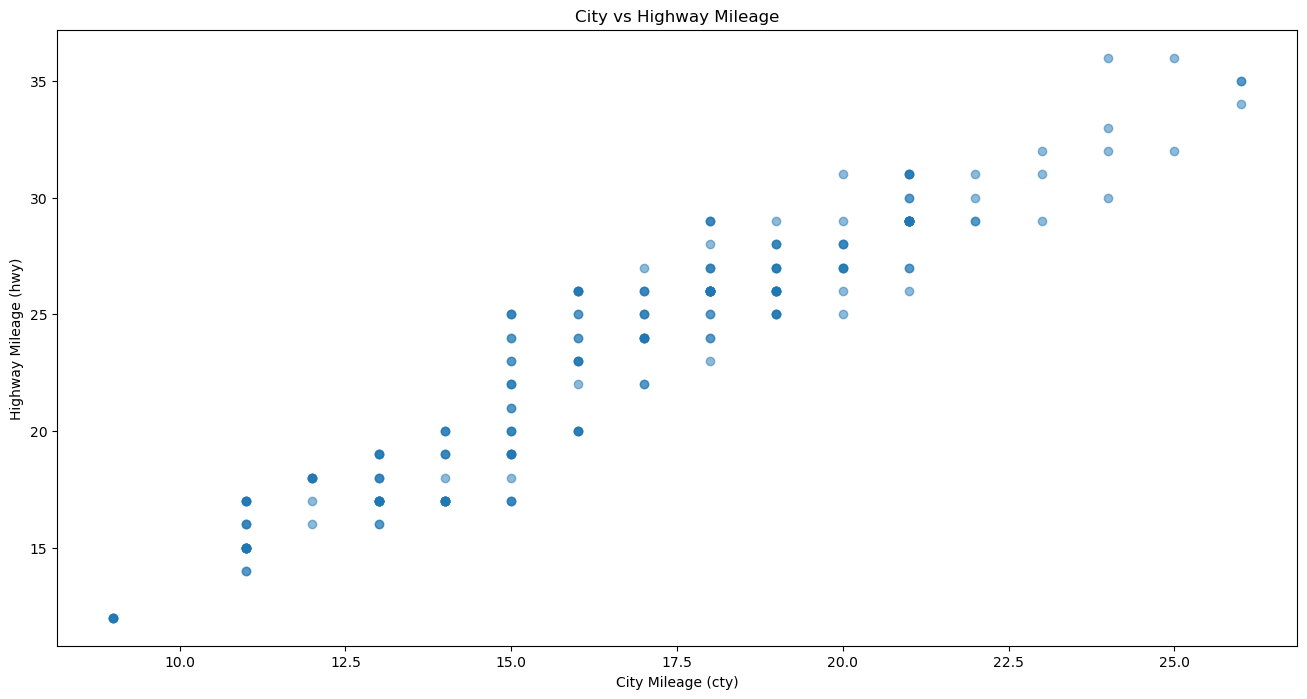

In [34]:
plt.figure(figsize=(16,8))
plt.scatter(cars['cty'], cars['hwy'], alpha=0.5)
plt.title('City vs Highway Mileage')
plt.xlabel('City Mileage (cty)')
plt.ylabel('Highway Mileage (hwy)')
plt.show()

In [39]:
x=cars['cty'].values.reshape(-1, 1)
y=cars['hwy'].values.reshape(-1, 1)

In [40]:
reg=LinearRegression()

In [41]:
reg.fit(x, y)

LinearRegression()

In [42]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

1.379692036308846
0.2692073058689459


In [43]:
predictions=reg.predict(x)

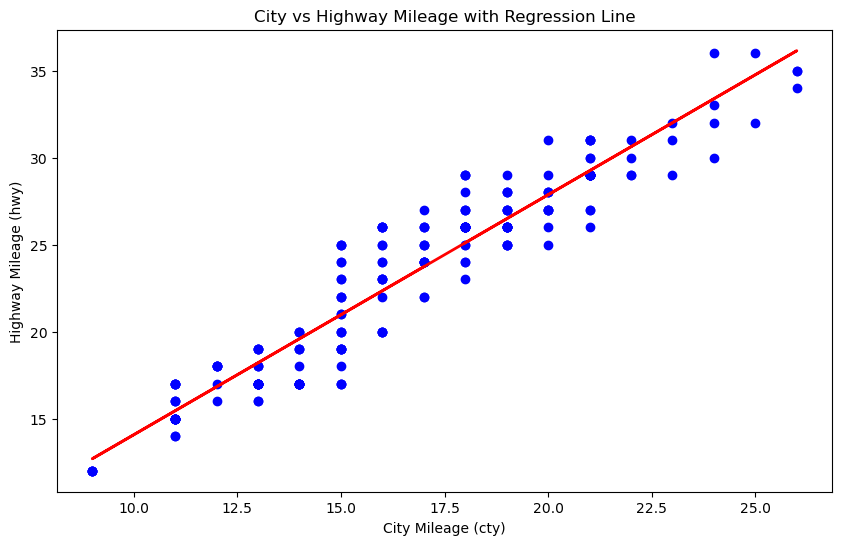

In [45]:
plt.figure(figsize=(10, 6)) 
plt.scatter(cars['cty'], cars['hwy'], color='blue', label='Actual Data')
plt.plot(cars['cty'], predictions, color='red', linewidth=2, label='Regression Line')
plt.title('City vs Highway Mileage with Regression Line')   
plt.xlabel('City Mileage (cty)')
plt.ylabel('Highway Mileage (hwy)')
plt.show()